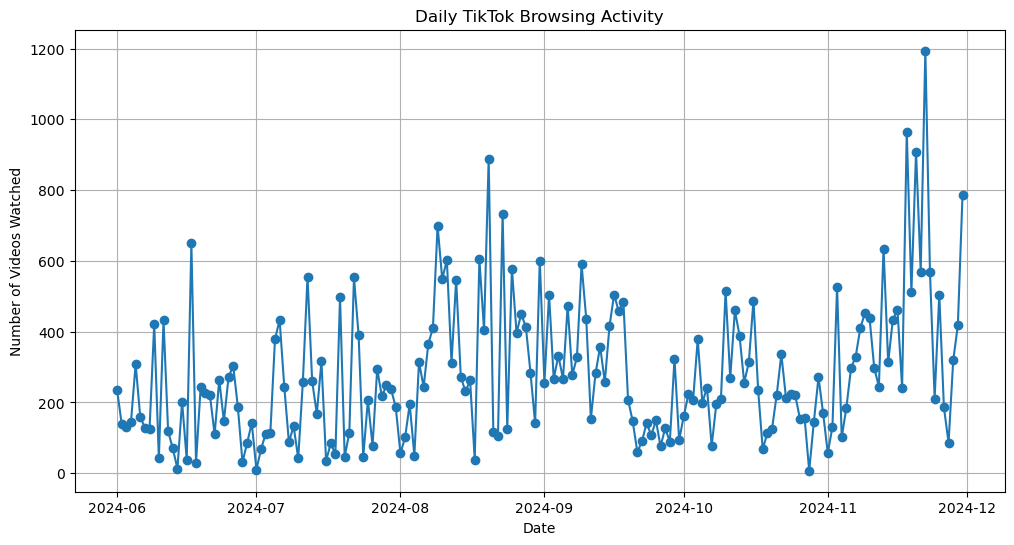

In [2]:
import matplotlib.pyplot as plt

# Group data by day
daily_activity = browsing_history.groupby(browsing_history['Date'].dt.date).size()

# Plot daily activity
plt.figure(figsize=(12, 6))
daily_activity.plot(kind='line', marker='o', title='Daily TikTok Browsing Activity')
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.grid(True)
plt.show()


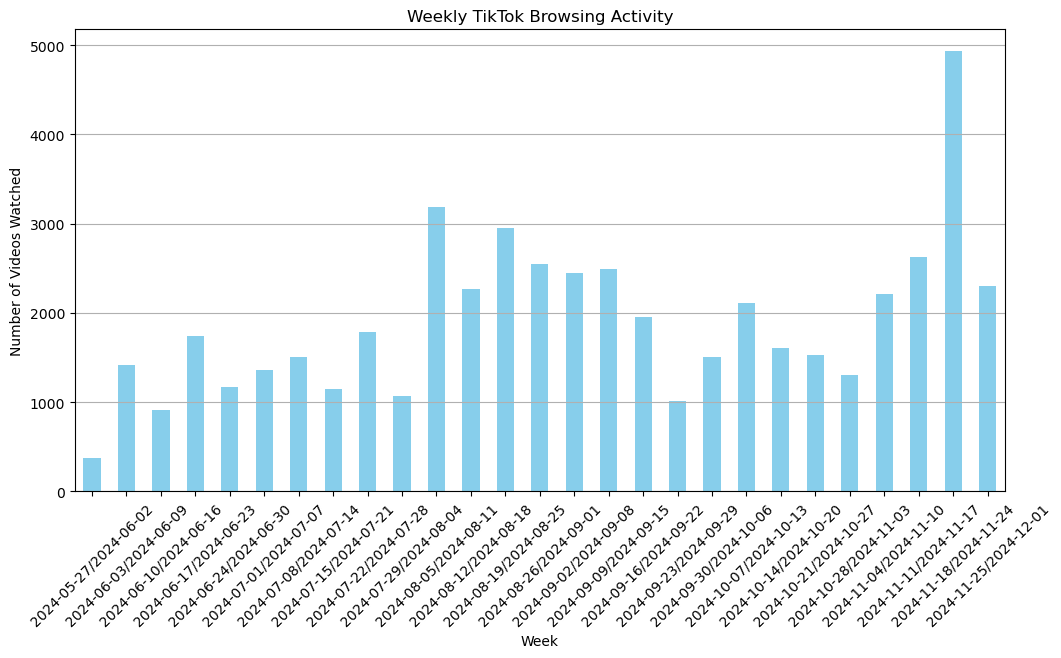

In [3]:
# Group data by week
weekly_activity = browsing_history.groupby(browsing_history['Date'].dt.to_period('W')).size()

# Plot weekly activity
plt.figure(figsize=(12, 6))
weekly_activity.plot(kind='bar', color='skyblue', title='Weekly TikTok Browsing Activity')
plt.xlabel('Week')
plt.ylabel('Number of Videos Watched')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


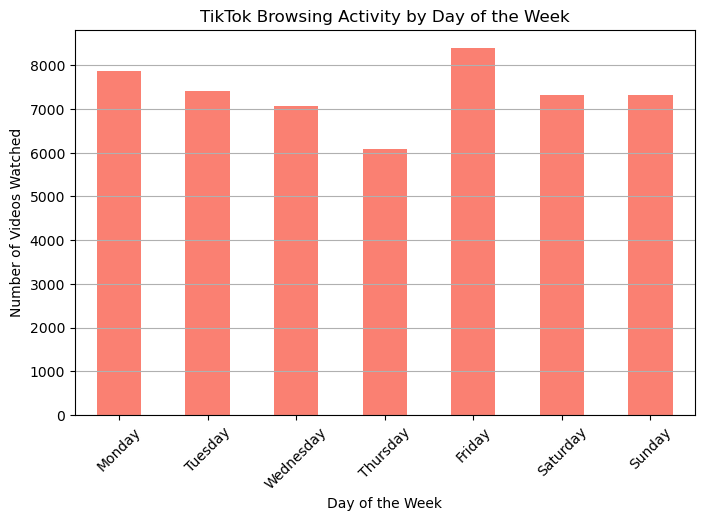

In [4]:
# Group data by weekday
weekday_activity = browsing_history['Weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot weekday activity
plt.figure(figsize=(8, 5))
weekday_activity.plot(kind='bar', color='salmon', title='TikTok Browsing Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Watched')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


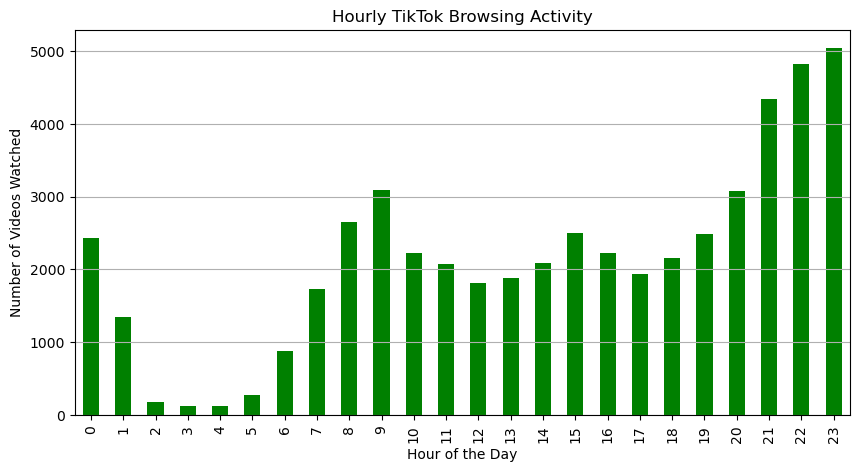

In [5]:
# Group data by hour
hourly_activity = browsing_history.groupby('Hour').size()

# Plot hourly activity
plt.figure(figsize=(10, 5))
hourly_activity.plot(kind='bar', color='green', title='Hourly TikTok Browsing Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos Watched')
plt.grid(axis='y')
plt.xticks(range(0, 24))
plt.show()


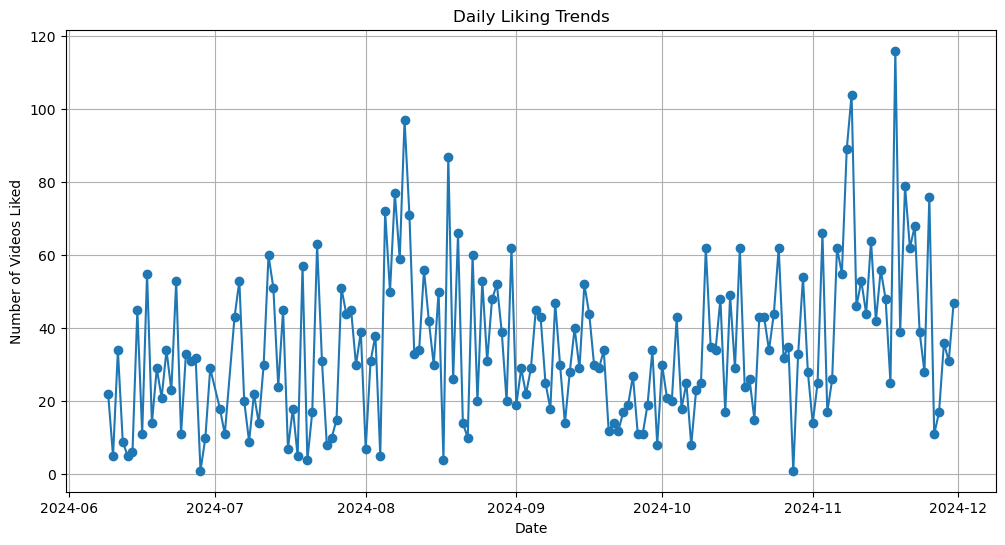

In [8]:
# Group by day and count likes
daily_likes = like_data.groupby(like_data['Date'].dt.date).size()

# Plot daily liking trends
plt.figure(figsize=(12, 6))
daily_likes.plot(kind='line', marker='o', title='Daily Liking Trends')
plt.xlabel('Date')
plt.ylabel('Number of Videos Liked')
plt.grid(True)
plt.savefig('daily_liking_trends.png', dpi=300, bbox_inches='tight')
plt.show()


Monthly Likes Trends:
Month
2024-06     513
2024-07     844
2024-08    1344
2024-09     791
2024-10    1023
2024-11    1485
Freq: M, dtype: int64


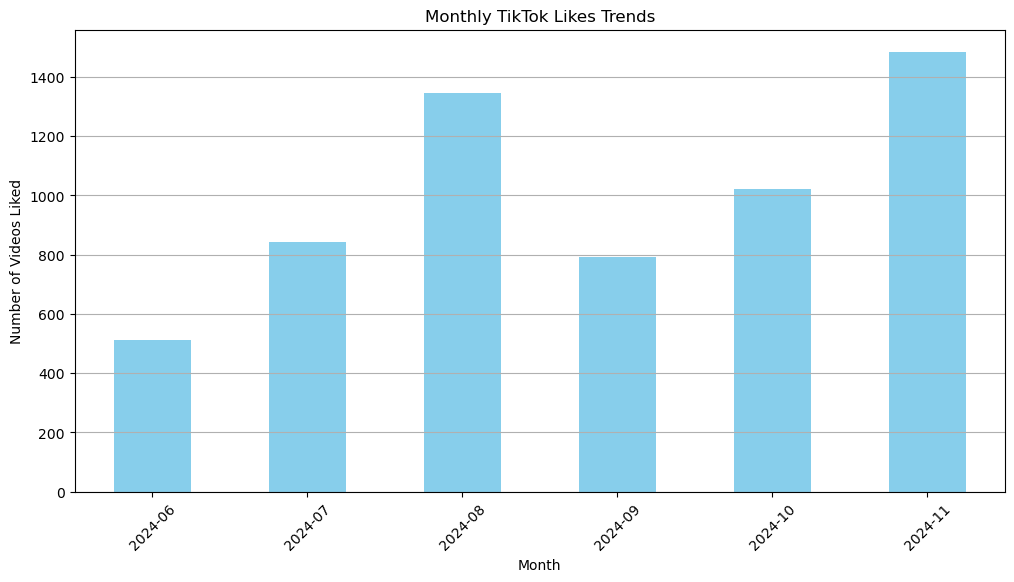

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Like List data
file_path = "Like List.txt"  # Replace with your file path
data = []
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("Date:"):
            date = line.split("Date: ")[1].strip()
        elif line.startswith("Link:"):
            link = line.split("Link: ")[1].strip()
            video_id = link.split('/')[-2]  # Extract Video ID
            data.append({"Date": date, "Video_ID": video_id})

# Create a DataFrame
like_data = pd.DataFrame(data)

# Convert 'Date' to datetime
like_data['Date'] = pd.to_datetime(like_data['Date'])

# Group by month
like_data['Month'] = like_data['Date'].dt.to_period('M')
monthly_likes = like_data.groupby('Month').size()

# Print monthly trends
print("Monthly Likes Trends:")
print(monthly_likes)

# Plot monthly trends
plt.figure(figsize=(12, 6))
monthly_likes.plot(kind='bar', color='skyblue', title='Monthly TikTok Likes Trends')
plt.xlabel('Month')
plt.ylabel('Number of Videos Liked')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('monthly_likes_trends.png', dpi=300, bbox_inches='tight')
plt.show()


Likes by Days of the Week:
Day_of_Week
Monday        872
Tuesday       808
Wednesday     828
Thursday      777
Friday       1002
Saturday      892
Sunday        821
Name: count, dtype: int64


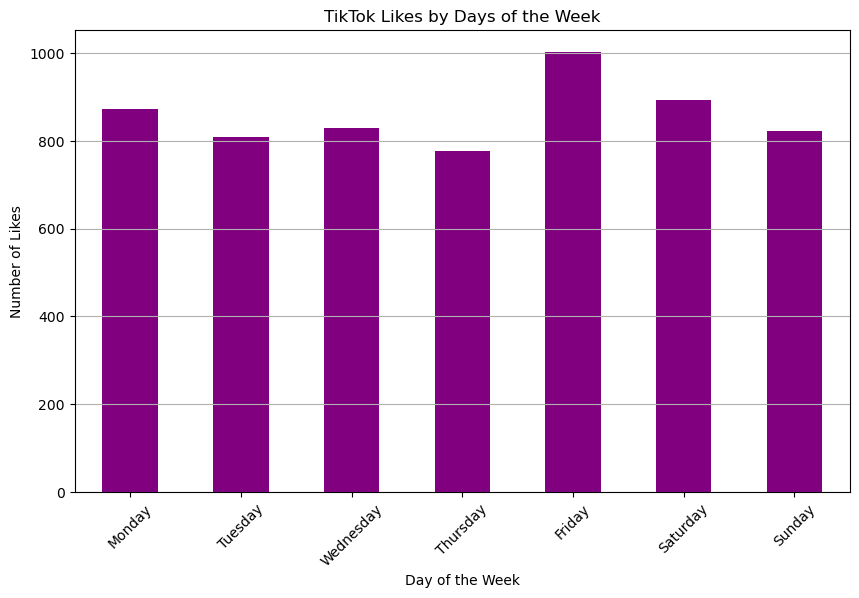

In [9]:
# Add a column for the day of the week
like_data['Day_of_Week'] = like_data['Date'].dt.day_name()

# Group by the day of the week and count the number of likes
weekly_likes = like_data['Day_of_Week'].value_counts()

# Reorder the days to start from Monday
weekly_likes = weekly_likes.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Print weekly trends
print("Likes by Days of the Week:")
print(weekly_likes)

# Plot weekly trends
plt.figure(figsize=(10, 6))
weekly_likes.plot(kind='bar', color='purple', title='TikTok Likes by Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('weekly_likes_trends.png', dpi=300, bbox_inches='tight')
plt.show()


In [41]:
# Analyze video links for patterns (e.g., common IDs, specific creators)
import pandas as pd

# Load the Like List data
file_path = "Like List.txt"
data = []
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("Link:"):
            link = line.split("Link: ")[1].strip()
            video_id = link.split('/')[-2]  # Extract Video ID
            data.append({"Link": link, "Video_ID": video_id})

# Create a DataFrame
like_data = pd.DataFrame(data)

# Display first few rows
print(like_data.head())


                                                Link             Video_ID
0  https://www.tiktokv.com/share/video/7430386597...  7430386597717101842
1  https://www.tiktokv.com/share/video/7443030289...  7443030289363832096
2  https://www.tiktokv.com/share/video/7442390808...  7442390808684170552
3  https://www.tiktokv.com/share/video/7433132883...  7433132883293916434
4  https://www.tiktokv.com/share/video/7441603615...  7441603615250189590


<Figure size 1200x600 with 0 Axes>

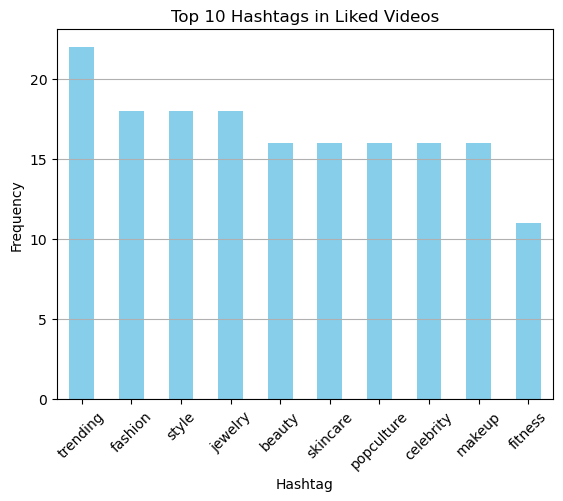

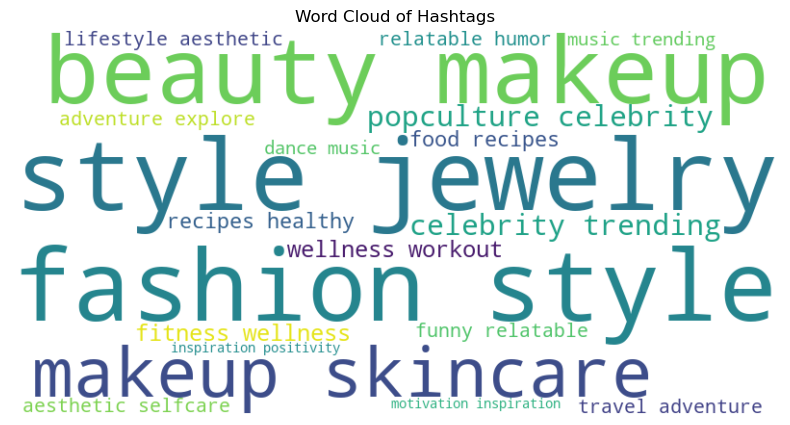

In [42]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the updated dataset
file_path = "manual_liked_videos_updated.csv"  # Replace with the correct path if needed
liked_videos_df = pd.read_csv(file_path)

# Flatten the hashtags column
all_hashtags = []
for hashtags in liked_videos_df["Hashtags"]:
    tags = eval(hashtags)  # Convert string to list
    all_hashtags.extend(tags)

# Count the frequency of each hashtag
hashtag_counts = Counter(all_hashtags)

# Convert to a DataFrame for visualization
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=["Hashtag", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Plot the top 10 hashtags
plt.figure(figsize=(12, 6))
hashtag_df.head(10).plot(kind="bar", x="Hashtag", y="Frequency", legend=False, color="skyblue")
plt.title("Top 10 Hashtags in Liked Videos")
plt.xlabel("Hashtag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
# Generate a word cloud for hashtags
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_hashtags))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Hashtags")
plt.show()


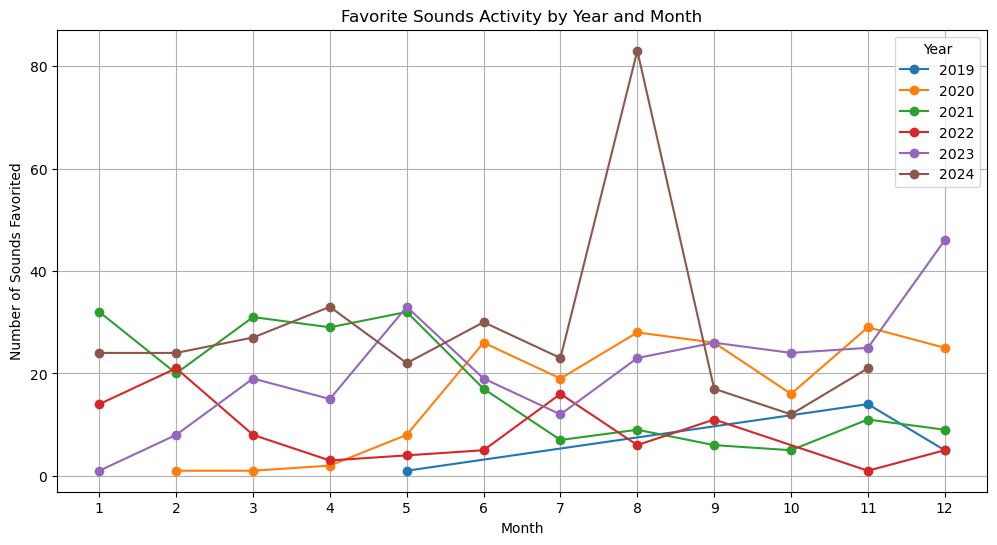

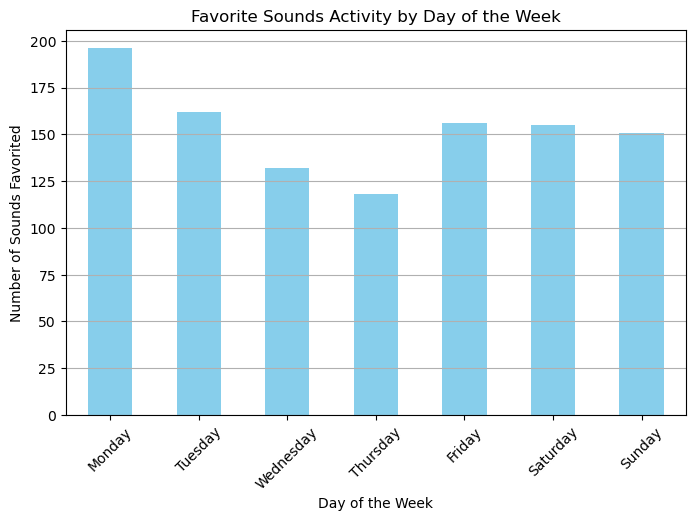

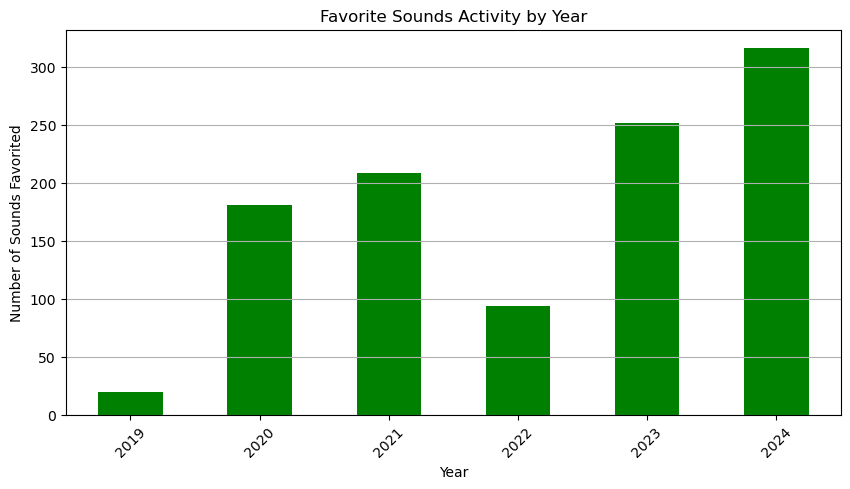

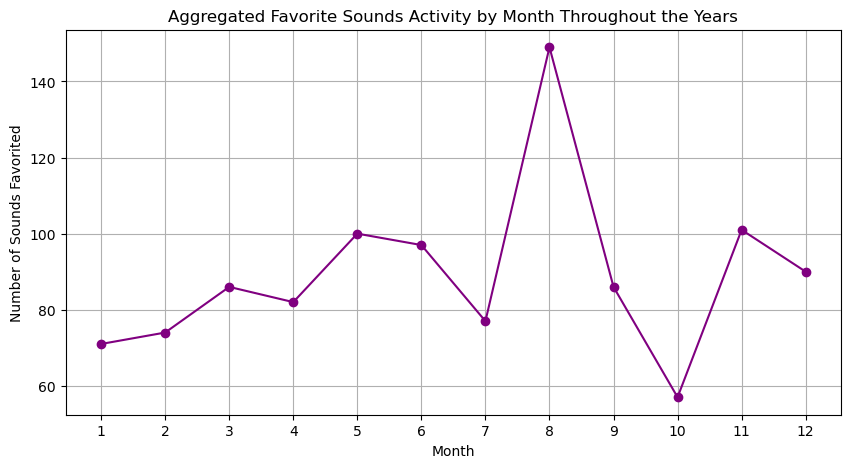

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file and process the data
file_path = 'Favorite Sounds.txt'  # Replace with the correct file path

# Read the file and extract dates and links
data = []
with open(file_path, 'r') as file:
    lines = file.readlines()
    for i in range(len(lines)):
        if lines[i].startswith("Date:"):
            date = lines[i].split("Date: ")[1].strip()
        if lines[i].startswith("Sound Link:"):
            sound_link = lines[i].split("Sound Link: ")[1].strip()
            data.append({"Date": date, "Sound Link": sound_link})

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, day, and hour
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

# 1. Temporal Trends: Activity by Year and Month
activity_year_month = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
for year in activity_year_month['Year'].unique():
    subset = activity_year_month[activity_year_month['Year'] == year]
    plt.plot(subset['Month'], subset['Count'], label=f"{year}", marker='o')

plt.title("Favorite Sounds Activity by Year and Month")
plt.xlabel("Month")
plt.ylabel("Number of Sounds Favorited")
plt.xticks(range(1, 13))
plt.legend(title="Year")
plt.grid(True)
plt.show()

# 2. Temporal Trends: Activity by Day of the Week
activity_day = df.groupby('Day').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8, 5))
activity_day.plot(kind='bar', color='skyblue', title="Favorite Sounds Activity by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Sounds Favorited")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Engagement Over Time: Activity by Year
activity_year = df.groupby('Year').size()

plt.figure(figsize=(10, 5))
activity_year.plot(kind='bar', color='green', title="Favorite Sounds Activity by Year")
plt.xlabel("Year")
plt.ylabel("Number of Sounds Favorited")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4. Aggregated Monthly Trends Across All Years with Updated Title
activity_month = df.groupby('Month').size()

plt.figure(figsize=(10, 5))
activity_month.plot(kind='line', marker='o', color='purple', title="Aggregated Favorite Sounds Activity by Month Throughout the Years")
plt.xlabel("Month")
plt.ylabel("Number of Sounds Favorited")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [14]:
# Inspect the first few rows of the DataFrame
print(liked_videos_df.head())

# Inspect column names
print(liked_videos_df.columns)


    Video_ID                                 Hashtags
0  video_001         ['beauty', 'makeup', 'skincare']
1  video_002         ['beauty', 'makeup', 'skincare']
2  video_003  ['popculture', 'celebrity', 'trending']
3  video_004          ['fashion', 'style', 'jewelry']
4  video_005  ['popculture', 'celebrity', 'trending']
Index(['Video_ID', 'Hashtags'], dtype='object')


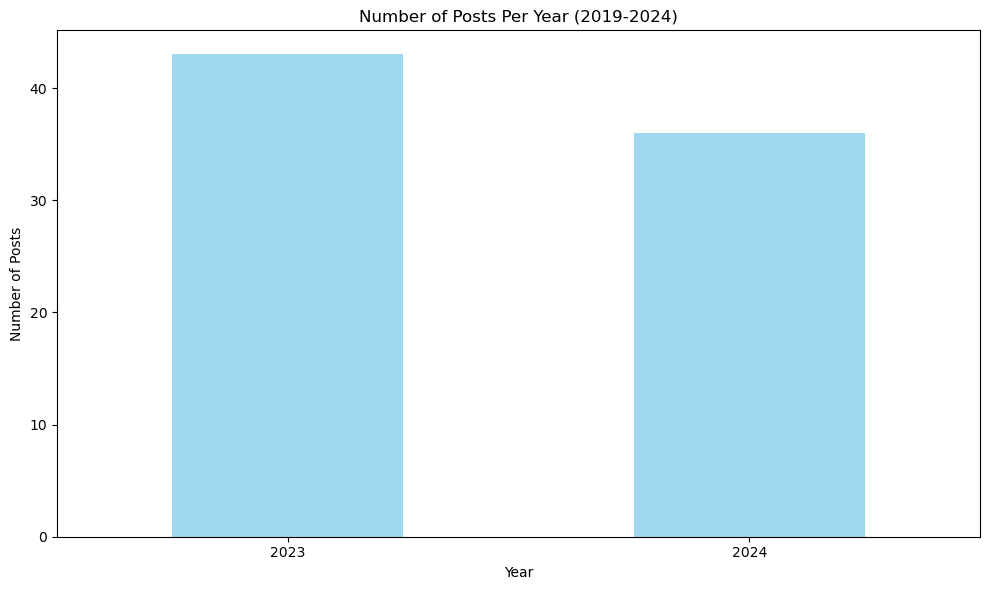

<Figure size 1000x600 with 0 Axes>

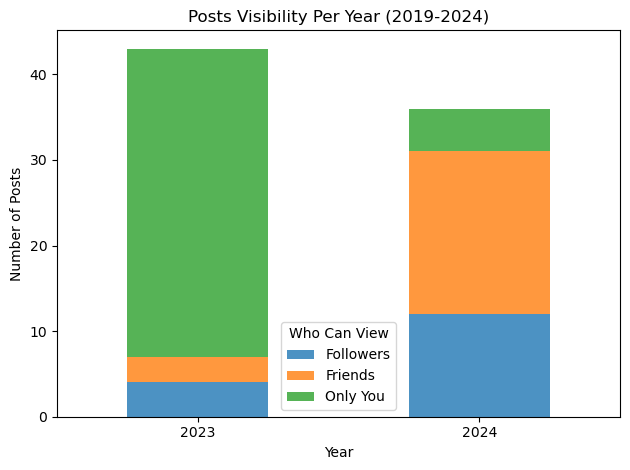

/var/folders/76/qxtsf6qj6g7cg1r7fjq2z3v00000gn/T/ipykernel_12603/19056018.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted(df_filtered['Year'].unique()), patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"))


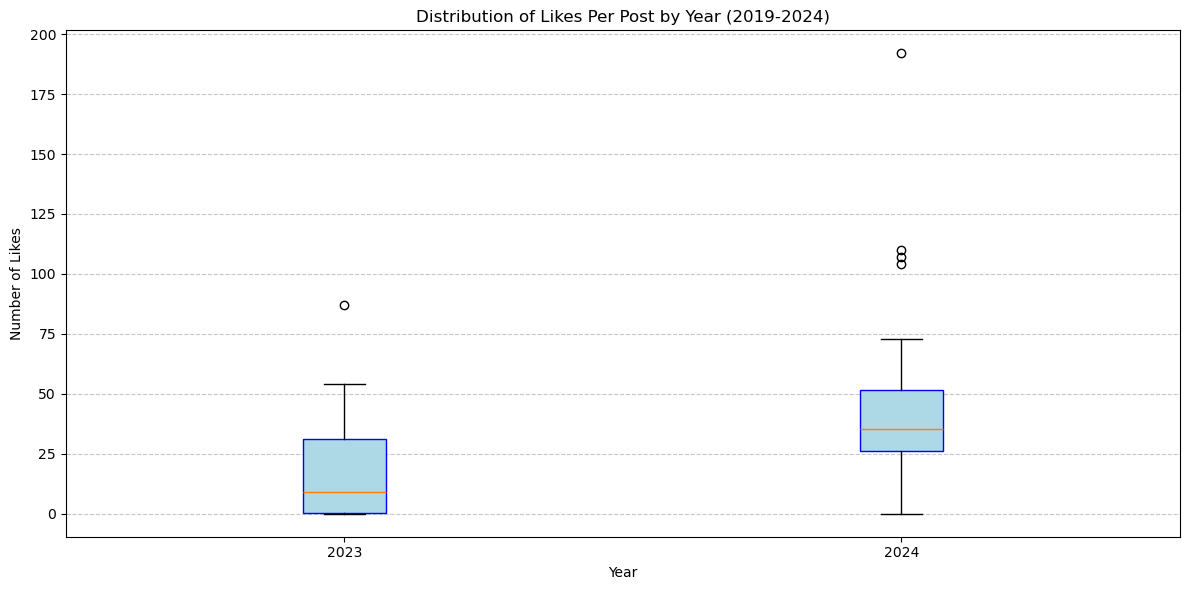

Sounds and Captions by Year:
 Year                                                                                      Sound            Caption
 2023                                                                  الصوت الأصلي - jookaalpro                N/A
 2023                                                      Hurts Me (Alone At Prom) - Tory Lanez                N/A
 2023                                                                           fukumean - Gunna                N/A
 2023                                                                   original sound - djfeezy                N/A
 2023                                                                 original sound - hot_edit3                N/A
 2023                                                                     original sound - ultvj                N/A
 2023                                               THANK YOU FOR USING MY SOUND - fairyxg0ddess                N/A
 2023                                      

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load and process data
file_path = 'Post.txt'  # Ensure the file is in the same directory
data_blocks = []
current_block = {}
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("Date:"):
            if current_block:
                data_blocks.append(current_block)
                current_block = {}
            current_block["Date"] = line.split("Date: ")[1].strip()
        elif line.startswith("Like(s):"):
            current_block["Likes"] = int(line.split("Like(s): ")[1].strip())
        elif line.startswith("Who can view:"):
            current_block["WhoCanView"] = line.split("Who can view: ")[1].strip()
        elif line.startswith("Sound:"):
            current_block["Sound"] = line.split("Sound: ")[1].strip()
        elif line.startswith("Adds yours text:"):
            current_block["Caption"] = line.split("Adds yours text: ")[1].strip()

# Add the last block if any
if current_block:
    data_blocks.append(current_block)

# Convert to DataFrame
df = pd.DataFrame(data_blocks)

# Data cleaning and extraction
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])  # Drop rows where date conversion failed
df['Year'] = df['Date'].dt.year
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0).astype(int)

# Filter data for years 2019-2024
df_filtered = df[(df['Year'] >= 2019) & (df['Year'] <= 2024)]

# Total Posts Per Year
posts_per_year = df_filtered.groupby('Year').size()

plt.figure(figsize=(10, 6))
posts_per_year.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Number of Posts Per Year (2019-2024)")
plt.ylabel("Number of Posts")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Posts by Visibility Per Year
posts_by_visibility = df_filtered.groupby(['Year', 'WhoCanView']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
posts_by_visibility.plot(kind='bar', stacked=True, alpha=0.8)
plt.title("Posts Visibility Per Year (2019-2024)")
plt.ylabel("Number of Posts")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Who Can View")
plt.tight_layout()
plt.show()

# Boxplot of Likes Per Post by Year
plt.figure(figsize=(12, 6))
boxplot_data = [df_filtered[df_filtered['Year'] == year]['Likes'] for year in sorted(df_filtered['Year'].unique())]
plt.boxplot(boxplot_data, labels=sorted(df_filtered['Year'].unique()), patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"))
plt.title("Distribution of Likes Per Post by Year (2019-2024)")
plt.ylabel("Number of Likes")
plt.xlabel("Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Table of Sounds and Captions by Year
df_table = df_filtered[['Year', 'Sound', 'Caption']]
print("Sounds and Captions by Year:")
print(df_table.sort_values(by='Year').to_string(index=False))


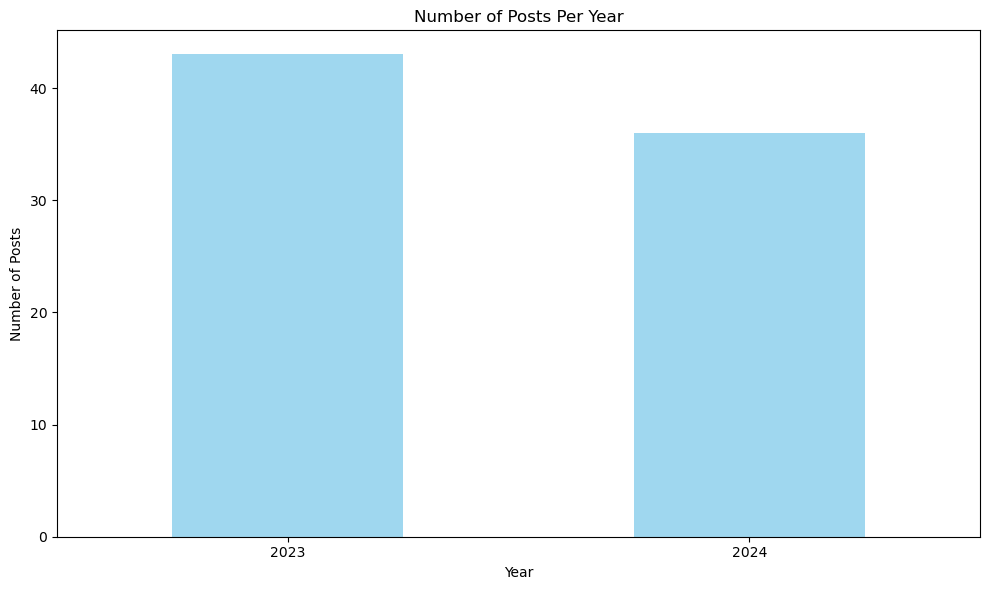

<Figure size 1000x600 with 0 Axes>

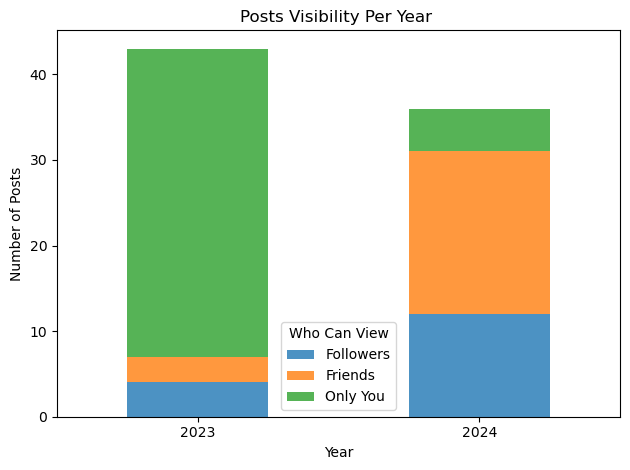

/var/folders/76/qxtsf6qj6g7cg1r7fjq2z3v00000gn/T/ipykernel_21004/601078485.py:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted(df_filtered['Year'].unique()), patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"))


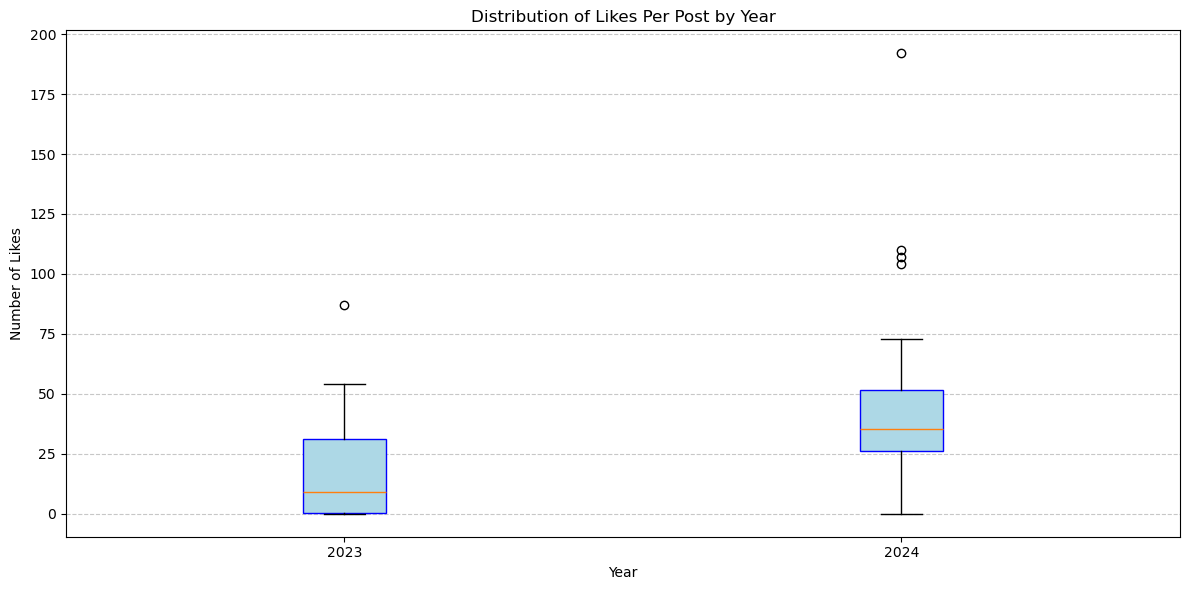

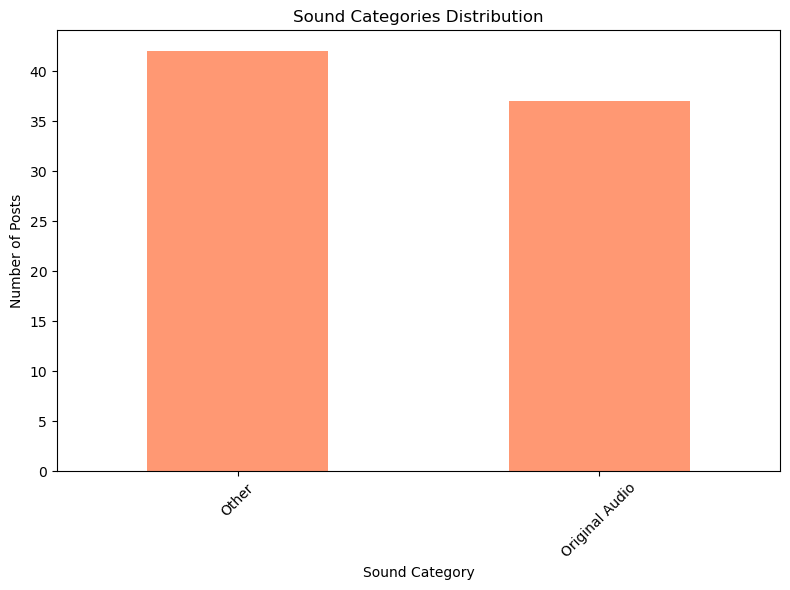

Sounds and Captions by Year:
 Year                                                                                      Sound            Caption  SoundCategory
 2023                                                                  الصوت الأصلي - jookaalpro                N/A          Other
 2023                                                      Hurts Me (Alone At Prom) - Tory Lanez                N/A          Other
 2023                                                                           fukumean - Gunna                N/A          Other
 2023                                                                   original sound - djfeezy                N/A Original Audio
 2023                                                                 original sound - hot_edit3                N/A Original Audio
 2023                                                                     original sound - ultvj                N/A Original Audio
 2023                                               TH

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load and process data
file_path = 'Post.txt'  # Ensure the file is in the same directory
data_blocks = []
current_block = {}
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("Date:"):
            if current_block:
                data_blocks.append(current_block)
                current_block = {}
            current_block["Date"] = line.split("Date: ")[1].strip()
        elif line.startswith("Like(s):"):
            current_block["Likes"] = int(line.split("Like(s): ")[1].strip())
        elif line.startswith("Who can view:"):
            current_block["WhoCanView"] = line.split("Who can view: ")[1].strip()
        elif line.startswith("Sound:"):
            current_block["Sound"] = line.split("Sound: ")[1].strip()
        elif line.startswith("Adds yours text:"):
            current_block["Caption"] = line.split("Adds yours text: ")[1].strip()

# Add the last block if any
if current_block:
    data_blocks.append(current_block)

# Convert to DataFrame
df = pd.DataFrame(data_blocks)

# Data cleaning and extraction
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])  # Drop rows where date conversion failed
df['Year'] = df['Date'].dt.year
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0).astype(int)

# Filter data for years 2019-2024
df_filtered = df[(df['Year'] >= 2019) & (df['Year'] <= 2024)]

# Categorize Sounds
def categorize_sound(sound):
    sound = sound.lower()
    if 'original' in sound:
        return 'Original Audio'
    elif 'music' in sound or 'song' in sound:
        return 'Music'
    elif 'speech' in sound:
        return 'Speech'
    else:
        return 'Other'

df_filtered['SoundCategory'] = df_filtered['Sound'].apply(categorize_sound)

# Total Posts Per Year
posts_per_year = df_filtered.groupby('Year').size()

plt.figure(figsize=(10, 6))
posts_per_year.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Number of Posts Per Year")
plt.ylabel("Number of Posts")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Posts by Visibility Per Year
posts_by_visibility = df_filtered.groupby(['Year', 'WhoCanView']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
posts_by_visibility.plot(kind='bar', stacked=True, alpha=0.8)
plt.title("Posts Visibility Per Year ")
plt.ylabel("Number of Posts")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Who Can View")
plt.tight_layout()
plt.show()

# Boxplot of Likes Per Post by Year
plt.figure(figsize=(12, 6))
boxplot_data = [df_filtered[df_filtered['Year'] == year]['Likes'] for year in sorted(df_filtered['Year'].unique())]
plt.boxplot(boxplot_data, labels=sorted(df_filtered['Year'].unique()), patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"))
plt.title("Distribution of Likes Per Post by Year")
plt.ylabel("Number of Likes")
plt.xlabel("Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Sounds by Category
sound_category_counts = df_filtered['SoundCategory'].value_counts()

plt.figure(figsize=(8, 6))
sound_category_counts.plot(kind='bar', color='coral', alpha=0.8)
plt.title("Sound Categories Distribution")
plt.ylabel("Number of Posts")
plt.xlabel("Sound Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Table of Sounds and Captions by Year
df_table = df_filtered[['Year', 'Sound', 'Caption', 'SoundCategory']
]
print("Sounds and Captions by Year:")
print(df_table.sort_values(by='Year').to_string(index=False))

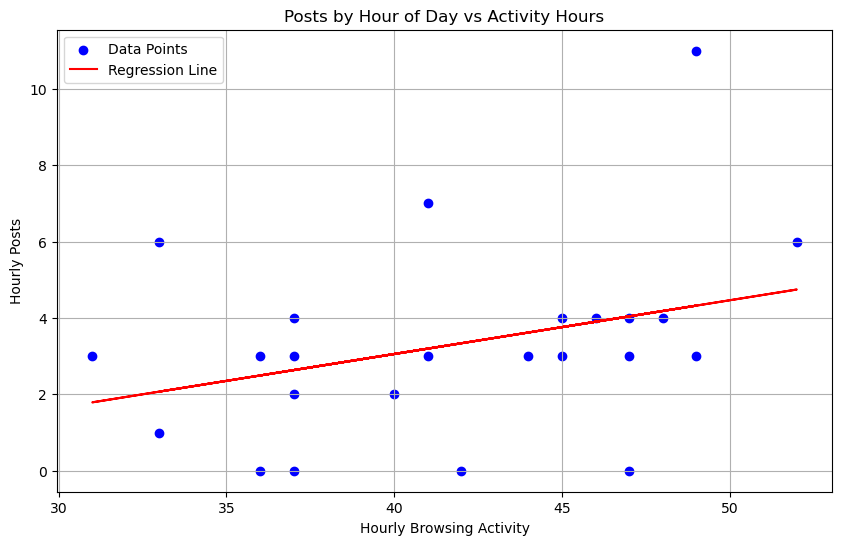

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load and process data
file_path = 'Post.txt'  # Ensure the file is in the same directory
data_blocks = []
current_block = {}
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("Date:"):
            if current_block:
                data_blocks.append(current_block)
                current_block = {}
            current_block["Date"] = line.split("Date: ")[1].strip()
        elif line.startswith("Like(s):"):
            current_block["Likes"] = int(line.split("Like(s): ")[1].strip())
        elif line.startswith("Who can view:"):
            current_block["WhoCanView"] = line.split("Who can view: ")[1].strip()
        elif line.startswith("Sound:"):
            current_block["Sound"] = line.split("Sound: ")[1].strip()
        elif line.startswith("Adds yours text:"):
            current_block["Caption"] = line.split("Adds yours text: ")[1].strip()

# Add the last block if any
if current_block:
    data_blocks.append(current_block)

# Convert to DataFrame
df = pd.DataFrame(data_blocks)

# Data cleaning and extraction
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])  # Drop rows where date conversion failed
df['Hour'] = df['Date'].dt.hour
df = df.dropna(subset=['Hour'])  # Drop rows where hour extraction failed

# Posts by hour
posts_by_hour = df.groupby('Hour').size()

# Simulated Browsing History Data (replace with actual data)
browsing_history = pd.DataFrame({
    'Hour': np.random.randint(0, 24, size=1000)  # Simulate browsing activity
})

# Group browsing data by hour
hourly_activity = browsing_history.groupby('Hour').size()

# Merge data for regression analysis
merged_data = pd.DataFrame({
    'Posts': posts_by_hour,
    'Activity': hourly_activity
}).fillna(0)

# Prepare data for regression
X = merged_data['Activity'].values.reshape(-1, 1)
y = merged_data['Posts'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)

# Plot data with regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Activity'], merged_data['Posts'], color='blue', label='Data Points')
plt.plot(merged_data['Activity'], trendline, color='red', label='Regression Line')
plt.title('Posts by Hour of Day vs Activity Hours')
plt.xlabel('Hourly Browsing Activity')
plt.ylabel('Hourly Posts')
plt.legend()
plt.grid()
plt.show()


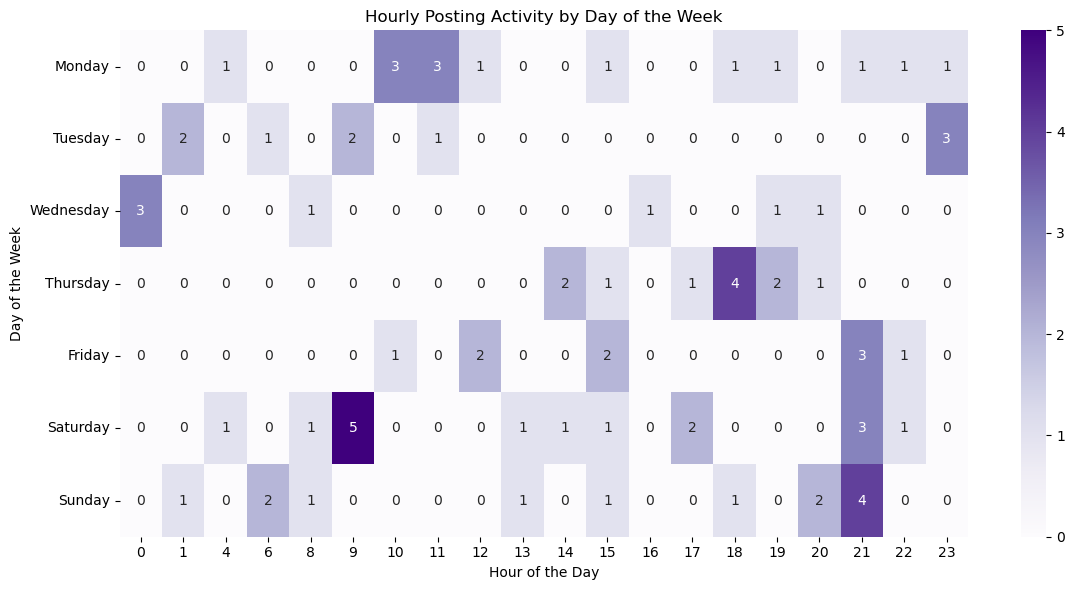

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and process posts data
file_path = 'Post.txt'  # Ensure the file is in the same directory
posts_data = []
current_block = {}
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("Date:"):
            if current_block:
                posts_data.append(current_block)
                current_block = {}
            current_block["Date"] = line.split("Date: ")[1].strip()
        elif line.startswith("Like(s):"):
            current_block["Likes"] = int(line.split("Like(s): ")[1].strip())
        elif line.startswith("Who can view:"):
            current_block["WhoCanView"] = line.split("Who can view: ")[1].strip()
        elif line.startswith("Sound:"):
            current_block["Sound"] = line.split("Sound: ")[1].strip()
        elif line.startswith("Adds yours text:"):
            current_block["Caption"] = line.split("Adds yours text: ")[1].strip()

# Add the last block if any
if current_block:
    posts_data.append(current_block)

# Convert to DataFrame
df = pd.DataFrame(posts_data)

# Process Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])  # Drop rows where date conversion failed
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day_name()

# Pivot data for heatmap
heatmap_data = df.groupby(['Day', 'Hour']).size().unstack(fill_value=0)

# Sort days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Purples", annot=True, fmt="d", cbar=True)
plt.title("Hourly Posting Activity by Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()


In [12]:
# Define the file path
file_path = "Follower.txt"  # Replace with the actual path to your file

# Initialize a counter for usernames
username_count = 0

# Open and read the file
with open(file_path, "r") as file:
    lines = file.readlines()

    # Iterate through the lines and count "Username" occurrences
    for line in lines:
        if line.startswith("Username:"):
            username_count += 1

print(f"Total Followers: {username_count}")


Total Followers: 520


In [13]:
# Define the file path
file_path = "Following.txt"  # Replace with the actual path to your file

# Initialize a counter for usernames
username_count = 0

# Open and read the file
with open(file_path, "r") as file:
    lines = file.readlines()

    # Iterate through the lines and count "Username" occurrences
    for line in lines:
        if line.startswith("Username:"):
            username_count += 1

print(f"Total Following: {username_count}")


Total Following: 1213


Total Following: 1213


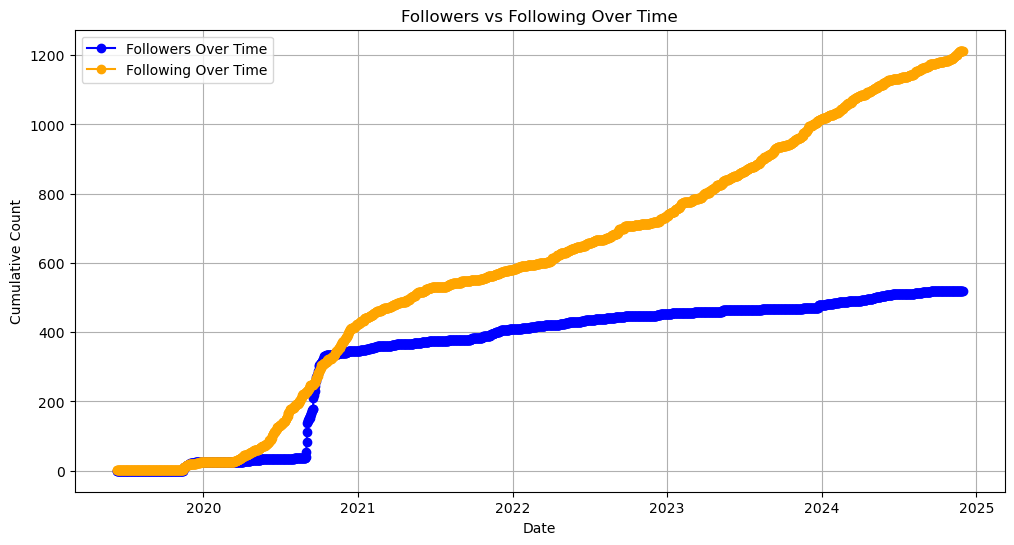

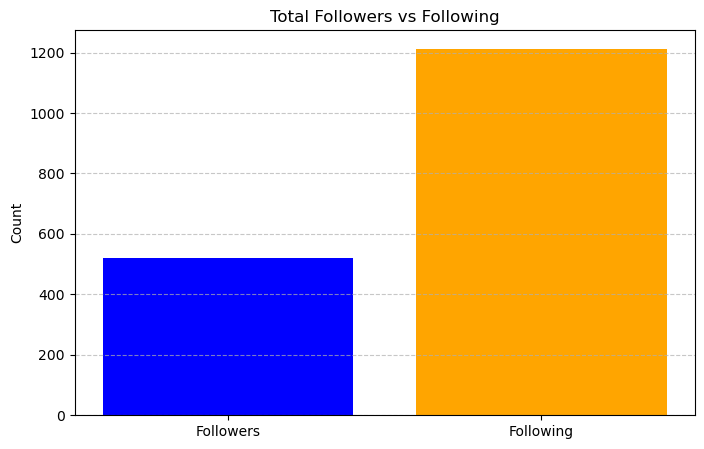

Total Followers: 520
Total Following: 1213
You follow more people than those who follow you.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to parse the text file and extract "Date" occurrences
def parse_tiktok_data(file_path):
    dates = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("Date:"):
                date = line.split("Date:")[1].strip()
                dates.append(date)
    return pd.DataFrame(dates, columns=["Date"])

# File paths
followers_file_path = "Follower.txt"  # Update with the actual path
following_file_path = "Following.txt"  # Update with the actual path

# Parse data
followers_data = parse_tiktok_data(followers_file_path)
following_data = parse_tiktok_data(following_file_path)

# Convert "Date" column to datetime
followers_data["Date"] = pd.to_datetime(followers_data["Date"], errors="coerce")
following_data["Date"] = pd.to_datetime(following_data["Date"], errors="coerce")

# Count occurrences of "Username:" in the file
with open(following_file_path, "r") as file:
    following_count = sum(1 for line in file if line.startswith("Username:"))
print(f"Total Following: {following_count}")

# Drop invalid dates
followers_data = followers_data.dropna()
following_data = following_data.dropna()

# Group by date and calculate cumulative counts
followers_over_time = followers_data.groupby(followers_data["Date"].dt.date).size().cumsum()
following_over_time = following_data.groupby(following_data["Date"].dt.date).size().cumsum()

# Ensure continuous date range for the x-axis
date_range = pd.date_range(start=min(followers_over_time.index.min(), following_over_time.index.min()),
                           end=max(followers_over_time.index.max(), following_over_time.index.max()))
followers_over_time = followers_over_time.reindex(date_range, method="ffill").fillna(0)
following_over_time = following_over_time.reindex(date_range, method="ffill").fillna(0)

# Plot followers vs following over time
plt.figure(figsize=(12, 6))
plt.plot(followers_over_time.index, followers_over_time.values, label="Followers Over Time", color="blue", marker="o")
plt.plot(following_over_time.index, following_over_time.values, label="Following Over Time", color="orange", marker="o")
plt.title("Followers vs Following Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
plt.legend()
plt.grid(True)
plt.show()

# Calculate totals directly from file counts
total_followers = len(followers_data)
total_following = len(following_data)

# Bar chart: Total followers vs following
plt.figure(figsize=(8, 5))
plt.bar(["Followers", "Following"], [total_followers, total_following], color=["blue", "orange"])
plt.title("Total Followers vs Following")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print results
print(f"Total Followers: {total_followers}")
print(f"Total Following: {total_following}")
if total_followers > total_following:
    print("You have more followers than those you follow.")
else:
    print("You follow more people than those who follow you.")


Chi-Square Statistic: 20.77, P-value: 0.9366, Degrees of Freedom: 32


/var/folders/76/qxtsf6qj6g7cg1r7fjq2z3v00000gn/T/ipykernel_21004/3204695798.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", len(video_types)).colors  # Use tab20 colormap with enough distinct colors


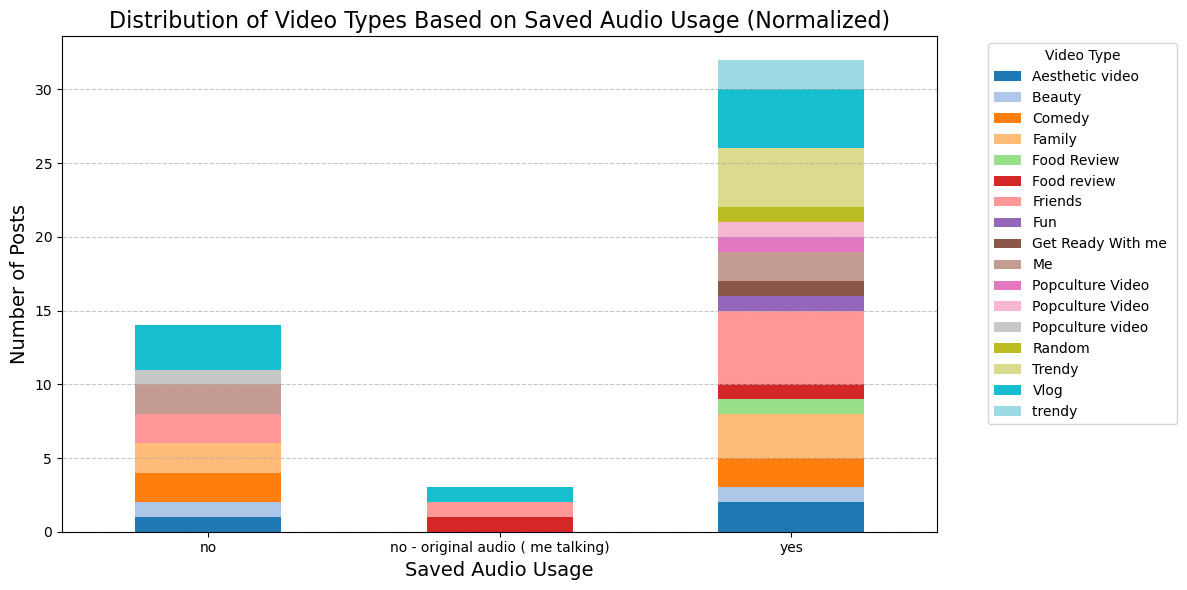

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the manually processed dataset
file_path = "maual_posted_videos.xlsx"  # Replace with the correct path to your file
manual_sounds_df = pd.read_excel(file_path)

# Normalize column names by stripping spaces and converting to lowercase
manual_sounds_df.columns = manual_sounds_df.columns.str.strip().str.lower()

# Normalize the "is a saved audio" column
manual_sounds_df["is a saved audio"] = manual_sounds_df["is a saved audio"].str.strip().str.lower()

# Categorize and count video types based on normalized "saved audio" status
saved_audio_data = manual_sounds_df.groupby(["is a saved audio", "type of video"]).size().unstack(fill_value=0)

# Perform a Chi-Square Test to determine the relationship
chi2, p, dof, expected = chi2_contingency(saved_audio_data)

# Display the results of the Chi-Square Test
print(f"Chi-Square Statistic: {chi2:.2f}, P-value: {p:.4f}, Degrees of Freedom: {dof}")

# Generate a unique color for each video type
video_types = saved_audio_data.columns
colors = cm.get_cmap("tab20", len(video_types)).colors  # Use tab20 colormap with enough distinct colors

# Visualization: Bar chart showing distribution of video types for saved vs. non-saved audios
saved_audio_data.plot(
    kind="bar",
    figsize=(12, 6),
    stacked=True,
    color=colors,
    legend=False
)

# Add legend with unique colors
plt.legend(video_types, title="Video Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Chart titles and labels
plt.title("Distribution of Video Types Based on Saved Audio Usage (Normalized)", fontsize=16)
plt.xlabel("Saved Audio Usage", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Chi-Square Statistic: 193.28
P-value: 0.0000
Degrees of Freedom: 5
The Chi-Square Test indicates a significant relationship. Your posted video themes are influenced by your liked hashtags.


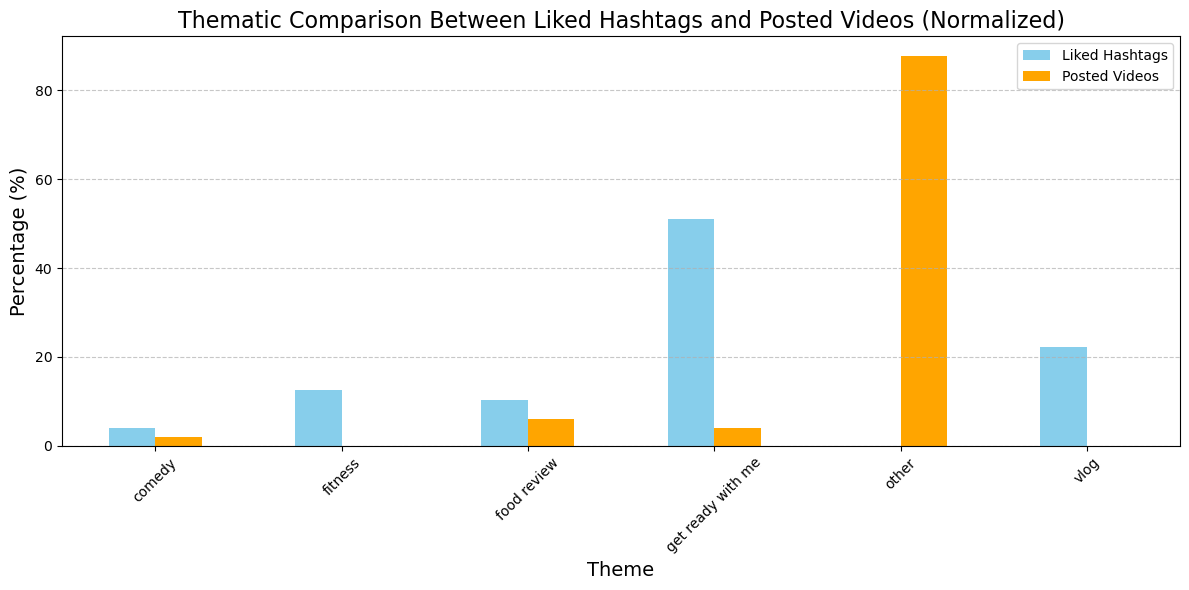

,Theme,Liked Hashtags (%),Posted Videos (%)
0,comedy,3.977273,2.040816
1,fitness,12.500000,0.000000
2,food review,10.227273,6.122449
3,get ready with me,51.136364,4.081633
4,other,0.000000,87.755102
5,vlog,22.159091,0.000000


In [34]:
import pandas as pd
from collections import Counter
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Load the datasets
manual_liked_file_path = "manual_liked_videos_updated.csv"  # Update path as needed
manual_posts_file_path = "maual_posted_videos.xlsx"  # Update path as needed
manual_liked_df = pd.read_csv(manual_liked_file_path)
manual_posts_df = pd.read_excel(manual_posts_file_path)

# Normalize column names for consistency
manual_liked_df.columns = manual_liked_df.columns.str.strip().str.lower()
manual_posts_df.columns = manual_posts_df.columns.str.strip().str.lower()

# Extract hashtags from liked videos and normalize them
liked_hashtags = []
for hashtags in manual_liked_df["hashtags"].dropna():
    tags = eval(hashtags)  # Convert string representation of a list to an actual list
    liked_hashtags.extend([tag.strip().lower() for tag in tags])  # Normalize hashtags

# Define thematic groups with normalization for variations
theme_mapping = {
    "get ready with me": ["makeup", "fashion", "trending", "style", "beauty"],
    "vlog": ["lifestyle", "popculture", "celebrity"],
    "fitness": ["fitness", "wellness", "health"],
    "food review": ["recipes", "food", "dining", "food review", "food reviews"],
    "comedy": ["fun", "humor", "laugh"]
}

# Create reverse mapping for hashtags to themes
hashtag_to_theme = {hashtag: theme for theme, hashtags in theme_mapping.items() for hashtag in hashtags}

# Map liked hashtags to themes
liked_theme_counts = pd.DataFrame.from_dict(Counter(
    [hashtag_to_theme.get(tag, "other") for tag in liked_hashtags if tag in hashtag_to_theme]
), orient='index', columns=["Liked Hashtags"]).rename_axis("Theme").reset_index()

# Normalize video types in manual_posts_df
manual_posts_df["type of video"] = manual_posts_df["type of video"].str.strip().str.lower()

# Map posted video types to themes
manual_posts_df["theme"] = manual_posts_df["type of video"].map(
    lambda x: next((theme for theme, keywords in theme_mapping.items() if x in keywords), "other")
)
posted_theme_counts = manual_posts_df["theme"].value_counts().reset_index()
posted_theme_counts.columns = ["Theme", "Posted Videos"]

# Merge the data for comparison
thematic_data = liked_theme_counts.merge(posted_theme_counts, on="Theme", how="outer").fillna(0)

# Create a contingency table for Chi-Square Test
contingency_table = thematic_data[["Liked Hashtags", "Posted Videos"]].to_numpy()

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print test results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Conclusion based on p-value
if p < 0.05:
    print("The Chi-Square Test indicates a significant relationship. Your posted video themes are influenced by your liked hashtags.")
else:
    print("The Chi-Square Test indicates no significant relationship. Your posted video themes are not strongly influenced by your liked hashtags.")

# Normalize the thematic data to percentages for better comparison
thematic_data["Liked Hashtags (%)"] = (
    thematic_data["Liked Hashtags"] / thematic_data["Liked Hashtags"].sum()
) * 100
thematic_data["Posted Videos (%)"] = (
    thematic_data["Posted Videos"] / thematic_data["Posted Videos"].sum()
) * 100

# Plot normalized data for proportional visualization
thematic_data.plot(
    kind="bar",
    x="Theme",
    y=["Liked Hashtags (%)", "Posted Videos (%)"],
    color=["skyblue", "orange"],
    figsize=(12, 6)
)
plt.title("Thematic Comparison Between Liked Hashtags and Posted Videos (Normalized)", fontsize=16)
plt.xlabel("Theme", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.legend(["Liked Hashtags", "Posted Videos"])
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Display the updated thematic data for review
thematic_data[["Theme", "Liked Hashtags (%)", "Posted Videos (%)"]]
